In [1]:
from vae import resVAE

from plot.plot import plot_loss
from data import make_pinwheel_data
from svae import SVAE

In [2]:
hyperparameters = {
    "VAE_parameters": {
        "latent_dim": 2,
        "input_size": 2,
        "hidden_size": 40,
        "recon_loss": "likelihood",
        "name": "vae",
    },
    "VAE_train_parameters": {"epochs": 500, "batch_size": 32, "kld_weight": 0.1},
    "pinwheel_data_parameters": {
        "radial_std": 0.3,
        "tangential_std": 0.05,
        "num_classes": 5,
        "num_per_class": 100,
        "rate": 0.25,
    },
    "SVAE_train_parameters": {
        "K": 15,
        "batch_size": 50,
        "epochs": 500,
        "kld_weight": 0.35,
    },
}

In [3]:
# generate synthetic data
data = make_pinwheel_data(**hyperparameters["pinwheel_data_parameters"])

In [4]:
# get encoder/decoder
network = resVAE(**hyperparameters["VAE_parameters"])

Training the SVAE ...


  0%|          | 0/501 [00:00<?, ?it/s]/var/tmp/vandenheu/SVAE/distributions/dirichlet.py:12: UserWarning: Specified kernel cache directory could not be created! This disables kernel caching. Specified directory is /tmp/xdg_cache_vandenheu/torch/kernels. This warning will appear only once per process. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755897462/work/aten/src/ATen/native/cuda/jit_utils.cpp:860.)
  stats = torch.digamma(alpha) - torch.digamma(torch.sum(alpha, -1, keepdim=True))
 56%|█████▋    | 282/501 [01:06<00:56,  3.90it/s]

iteration limit reached


 57%|█████▋    | 287/501 [01:07<00:59,  3.61it/s]

iteration limit reached


 65%|██████▍   | 325/501 [01:15<00:34,  5.06it/s]

iteration limit reached


 70%|███████   | 352/501 [01:21<00:42,  3.53it/s]

iteration limit reached


 72%|███████▏  | 359/501 [01:23<00:38,  3.74it/s]

iteration limit reached


 73%|███████▎  | 365/501 [01:24<00:28,  4.82it/s]

iteration limit reached


 74%|███████▍  | 370/501 [01:26<00:28,  4.52it/s]

iteration limit reached


 75%|███████▌  | 378/501 [01:28<00:31,  3.88it/s]

iteration limit reached


 78%|███████▊  | 392/501 [01:30<00:25,  4.28it/s]

iteration limit reached


 81%|████████  | 404/501 [01:33<00:22,  4.32it/s]

iteration limit reached


 83%|████████▎ | 414/501 [01:35<00:20,  4.18it/s]

iteration limit reached


 85%|████████▌ | 428/501 [01:38<00:17,  4.22it/s]

iteration limit reached


 86%|████████▌ | 430/501 [01:39<00:18,  3.80it/s]

iteration limit reached


 89%|████████▊ | 444/501 [01:42<00:12,  4.39it/s]

iteration limit reached


 89%|████████▉ | 448/501 [01:43<00:12,  4.19it/s]

iteration limit reached


 93%|█████████▎| 465/501 [01:46<00:08,  4.33it/s]

iteration limit reached


 94%|█████████▍| 472/501 [01:48<00:06,  4.18it/s]

iteration limit reached


 96%|█████████▋| 483/501 [01:50<00:04,  4.31it/s]

iteration limit reached


 97%|█████████▋| 484/501 [01:51<00:04,  3.78it/s]

iteration limit reached


 98%|█████████▊| 491/501 [01:52<00:02,  4.24it/s]

iteration limit reached


 99%|█████████▉| 496/501 [01:53<00:01,  4.10it/s]

iteration limit reached


 99%|█████████▉| 498/501 [01:54<00:00,  3.72it/s]

iteration limit reached


100%|█████████▉| 500/501 [01:54<00:00,  4.28it/s]

iteration limit reached


100%|██████████| 501/501 [01:55<00:00,  4.34it/s]


Finished training of the SVAE


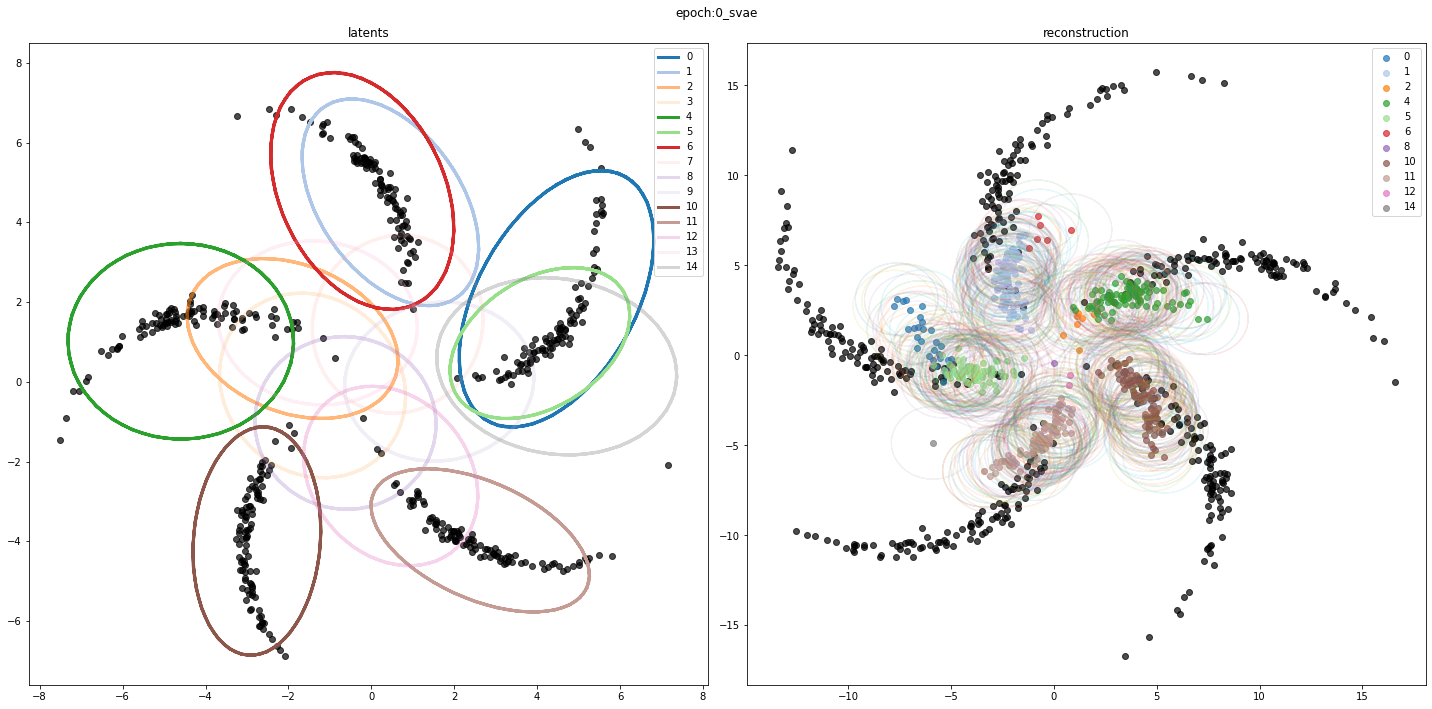

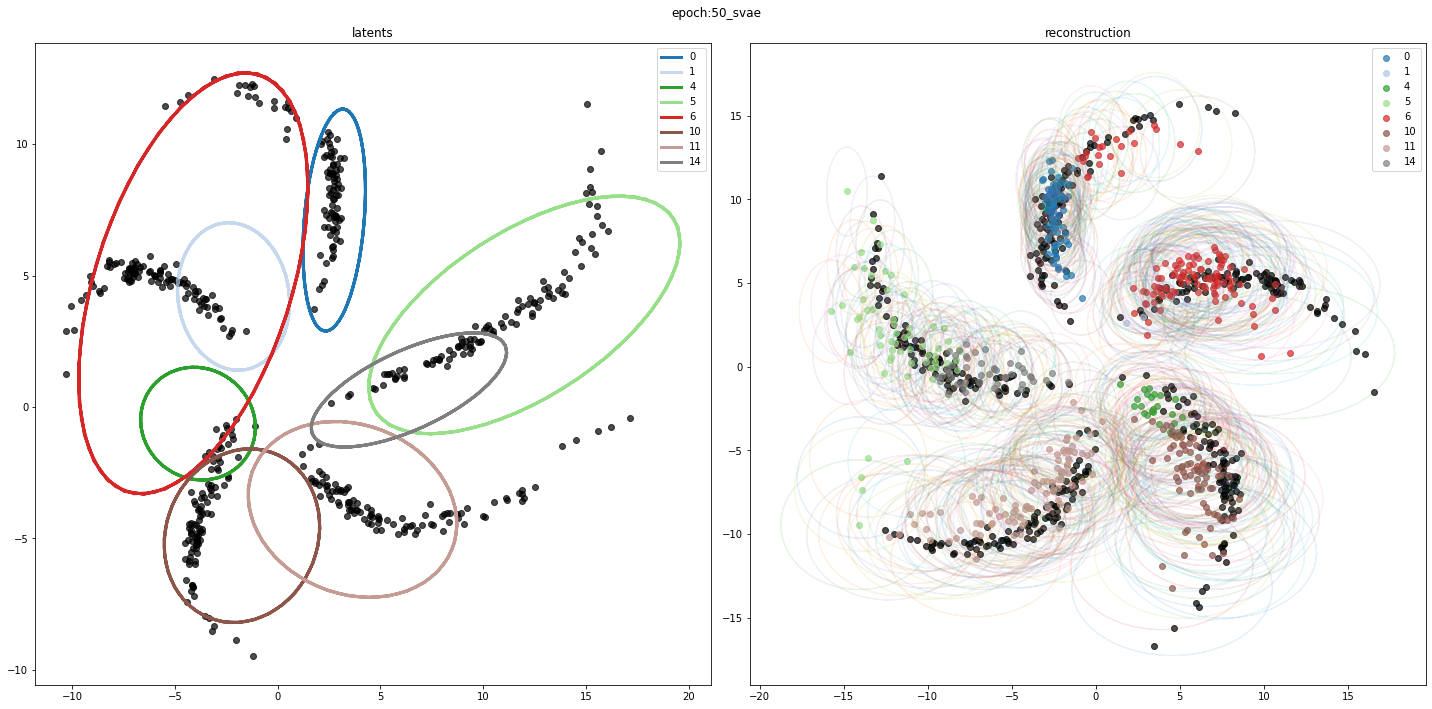

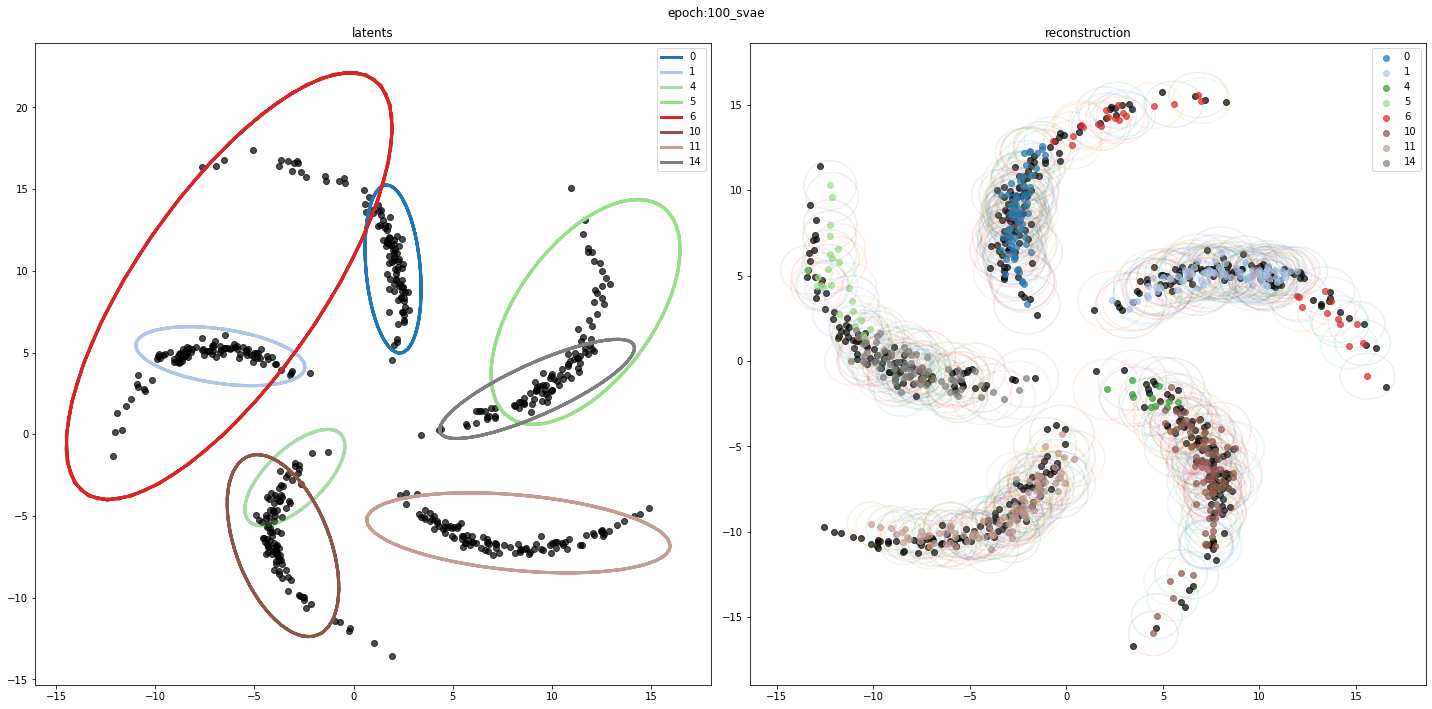

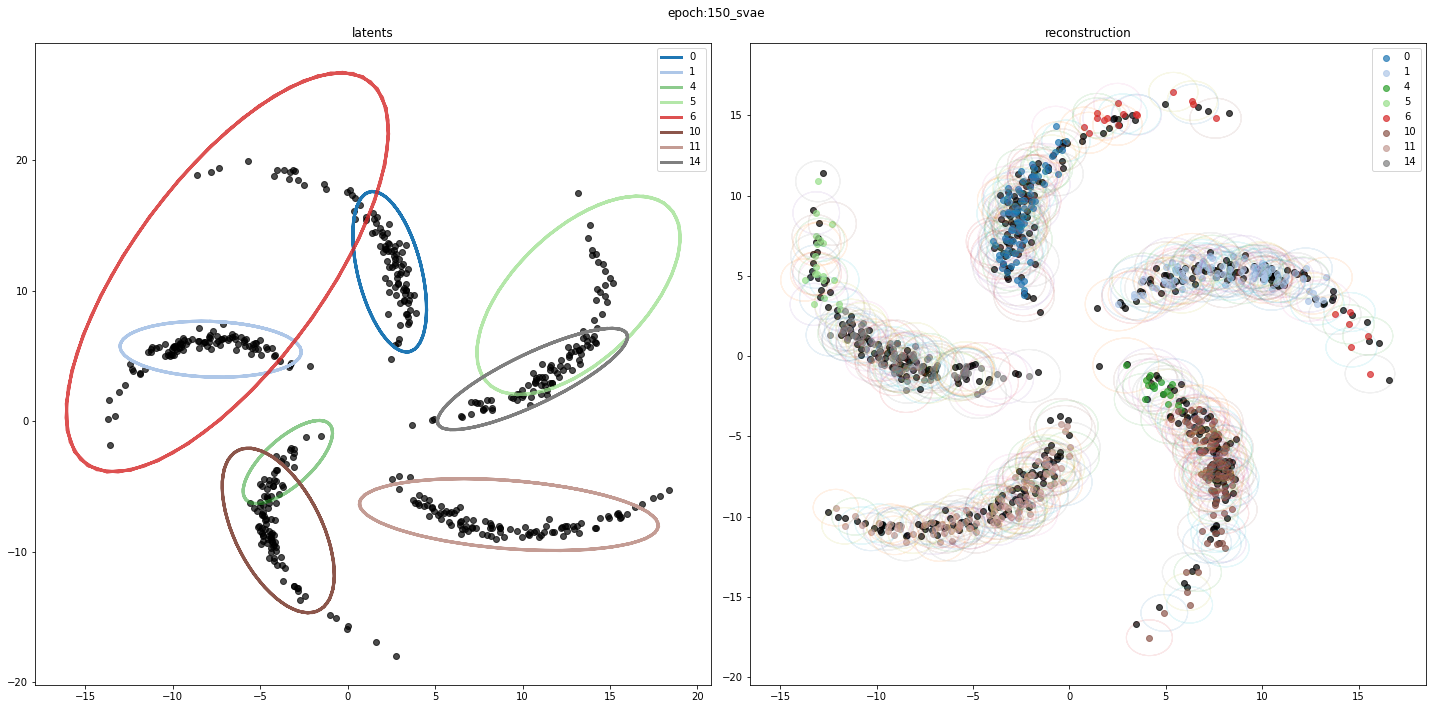

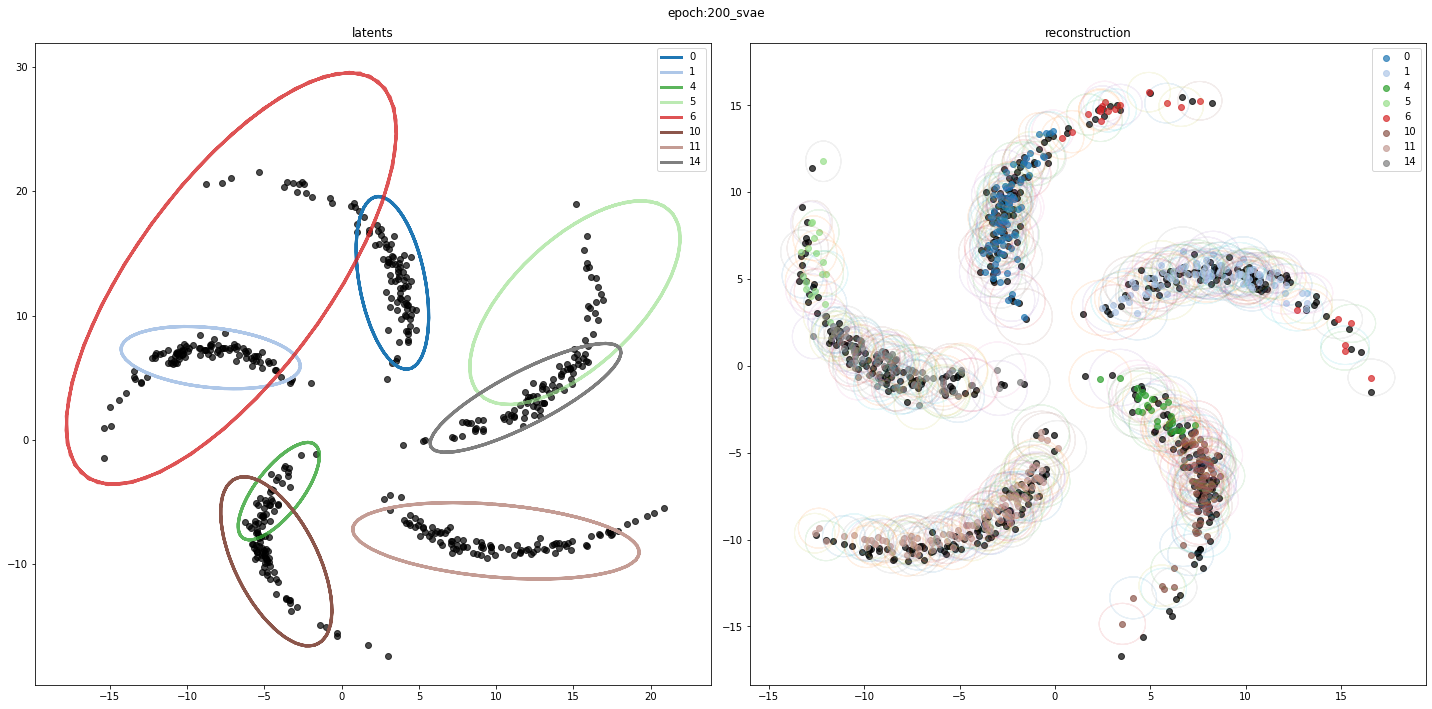

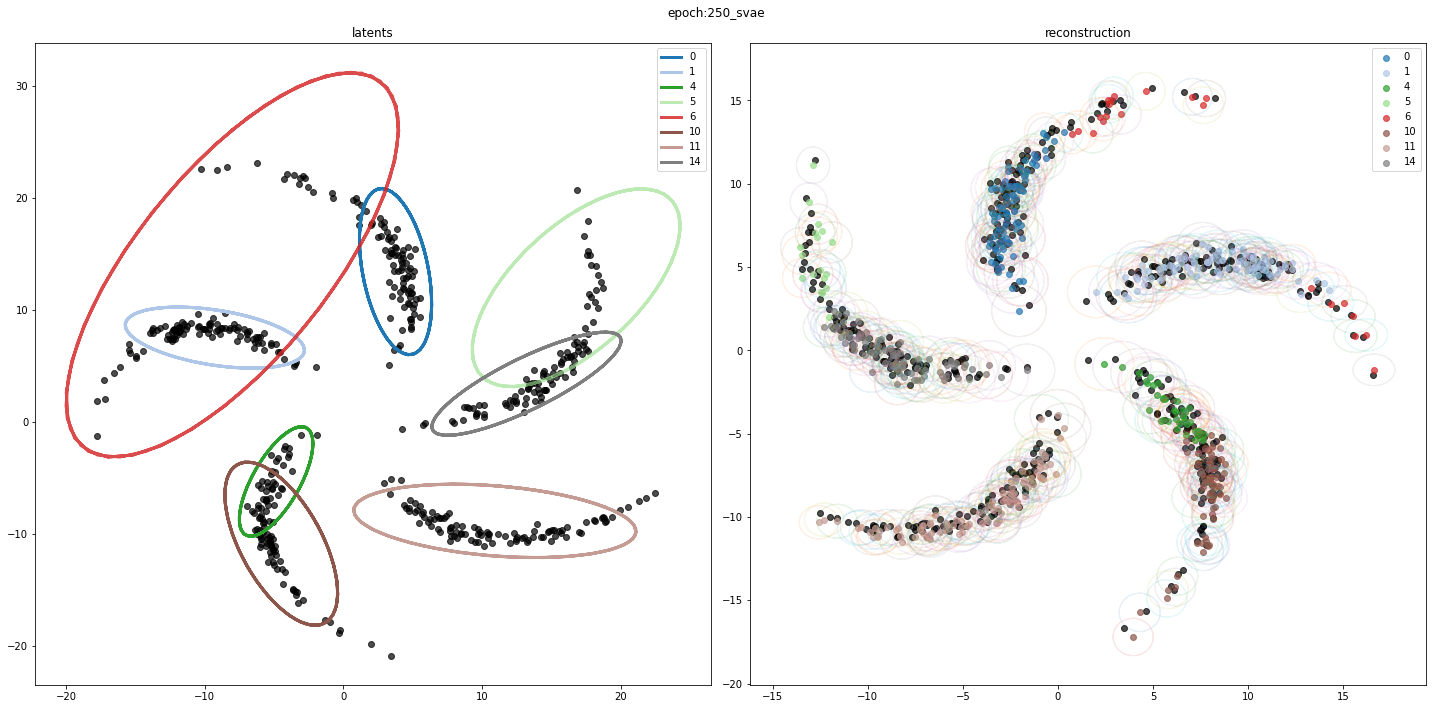

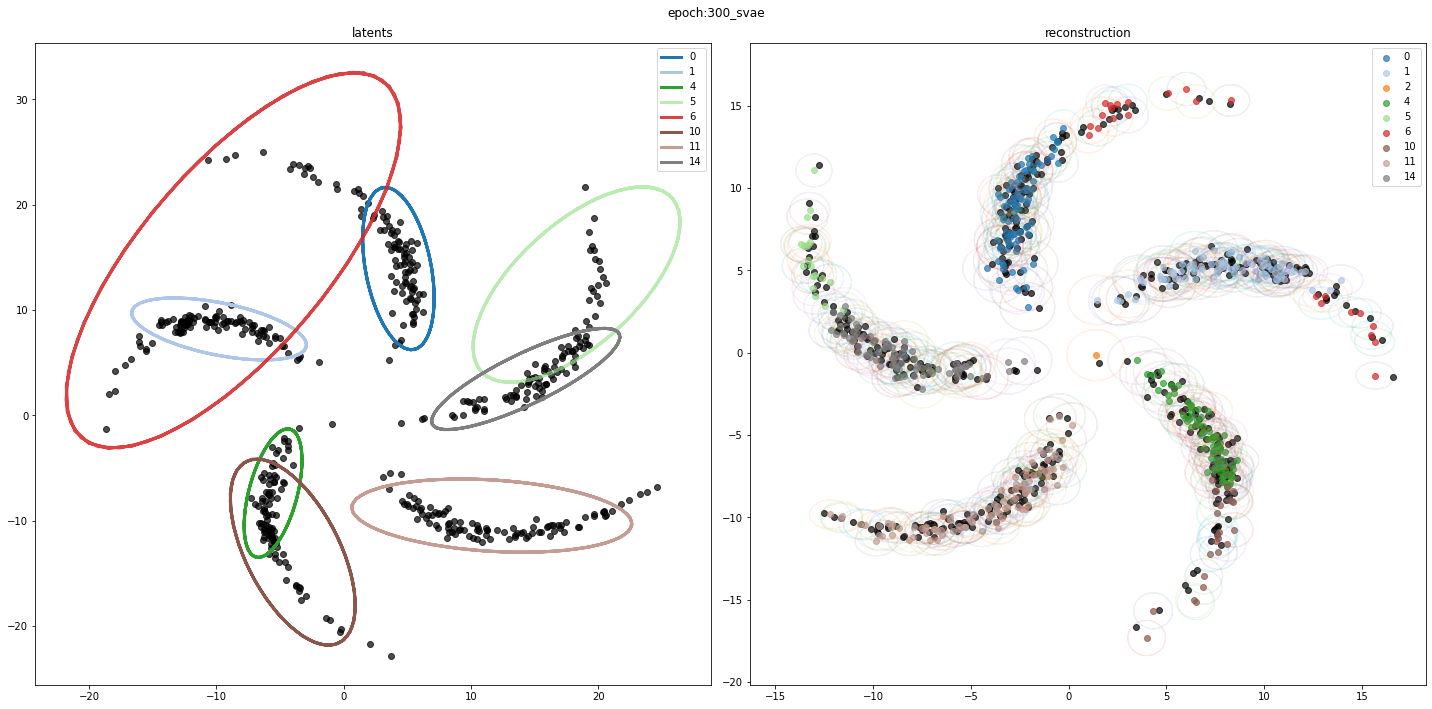

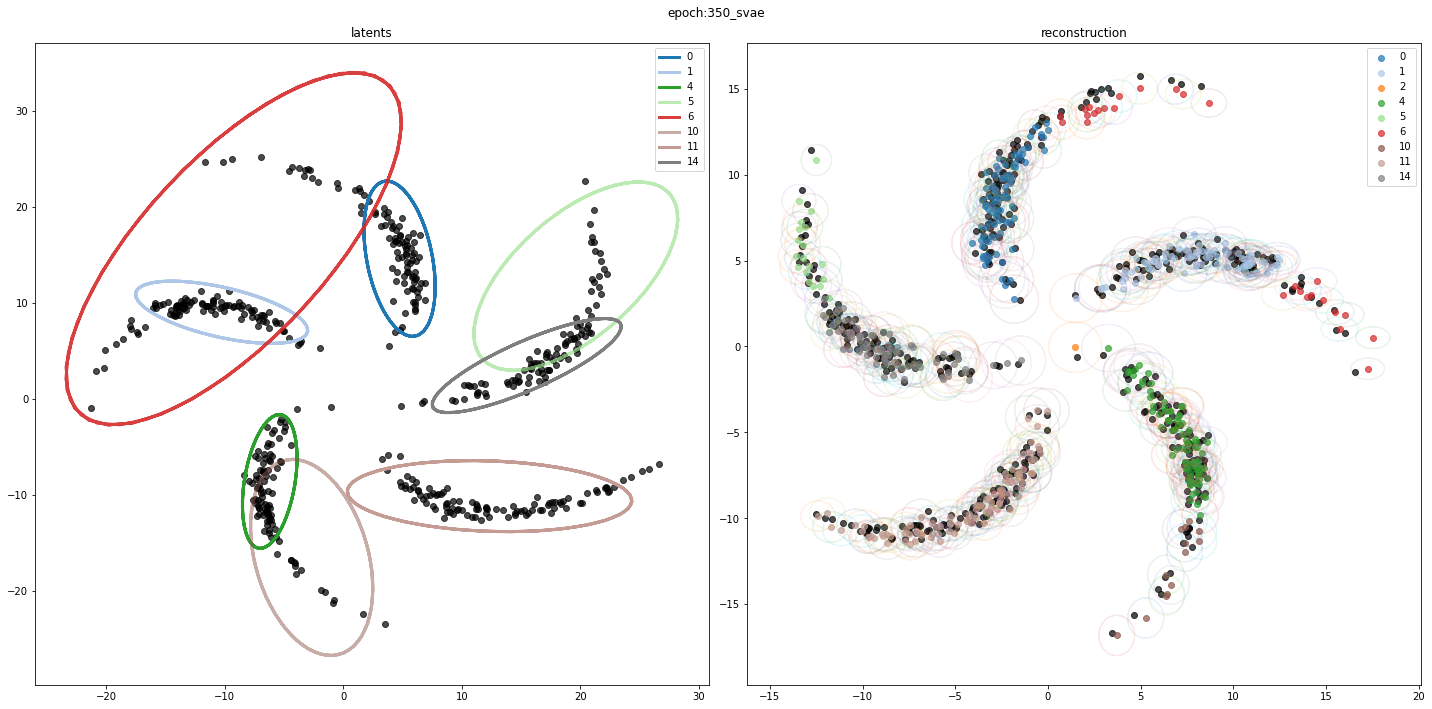

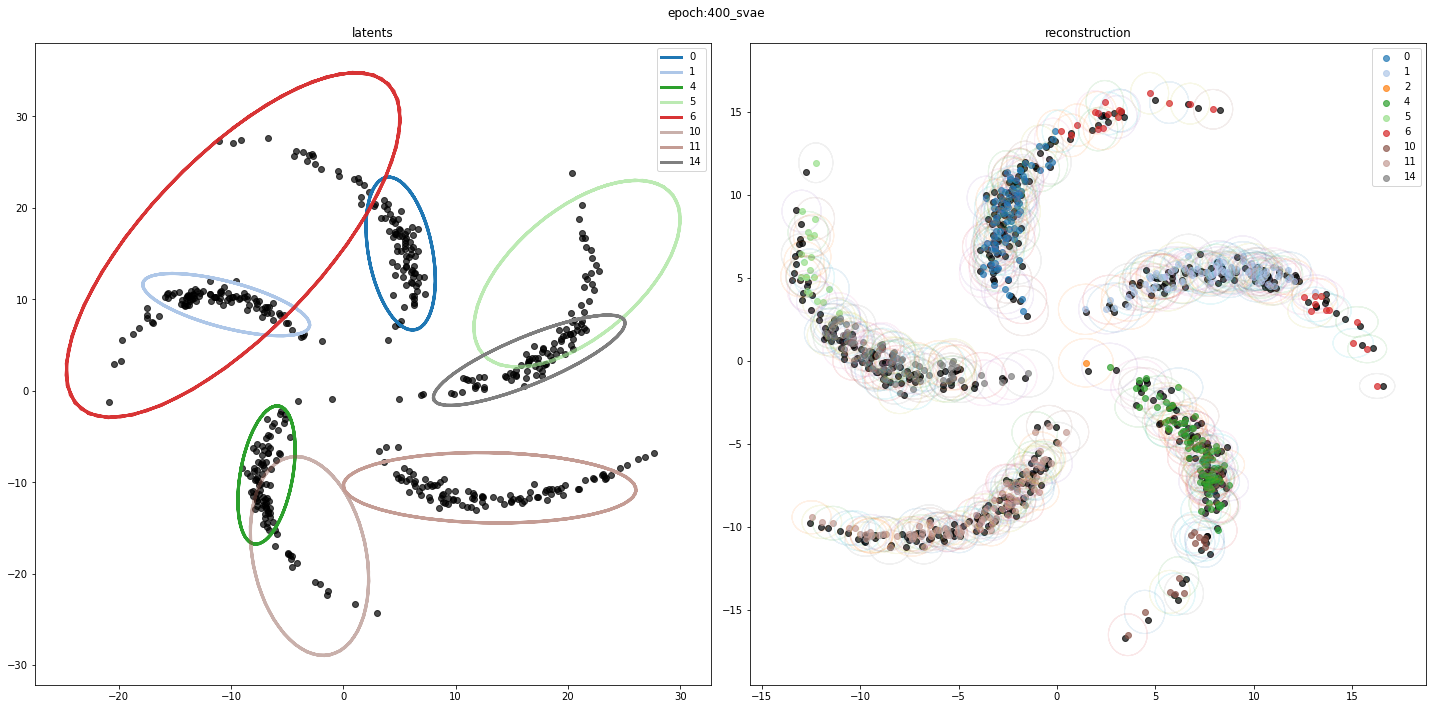

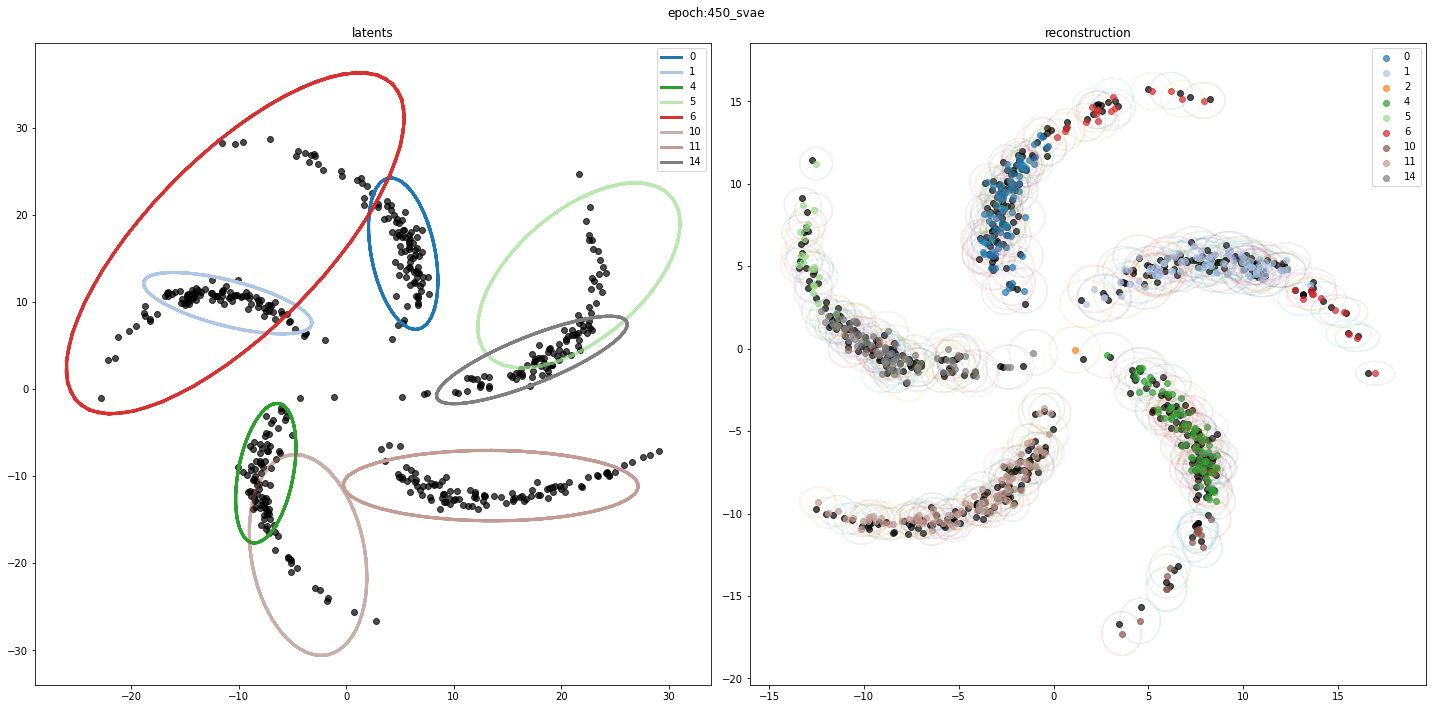

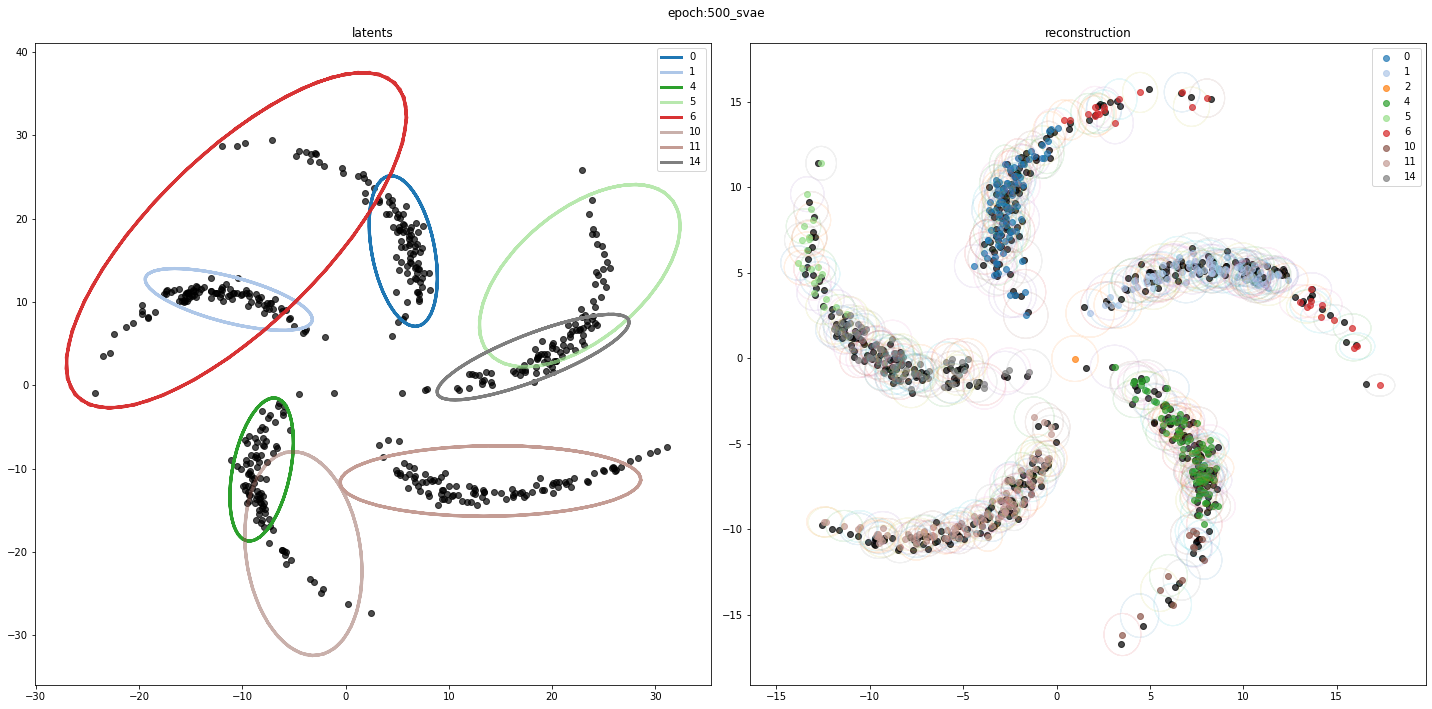

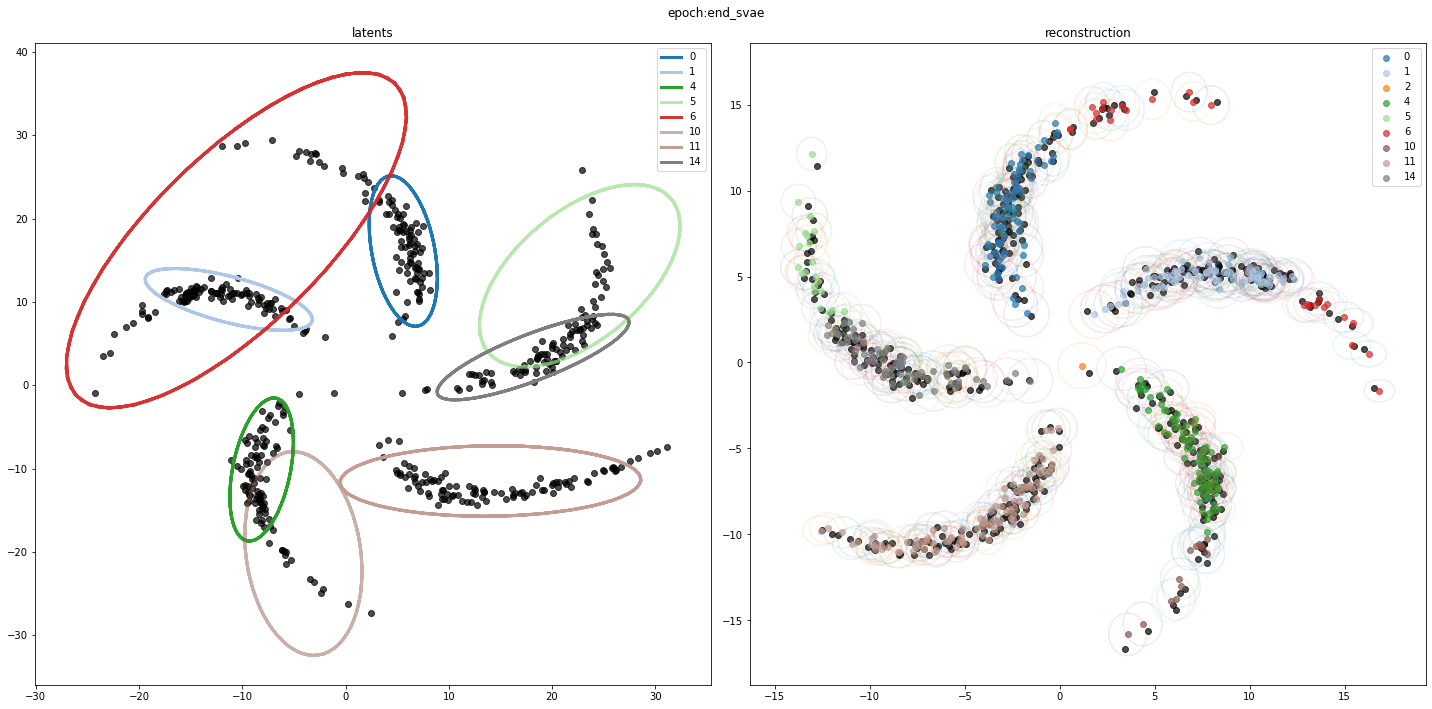

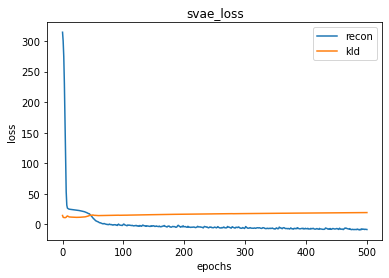

In [5]:
model = SVAE(network)
train_loss = model.fit(
    data,
    **hyperparameters["SVAE_train_parameters"]
)
plot_loss(
    train_loss, title="svae_loss"
)